In [1]:
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
import numpy as np
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

In [2]:
auto = pd.read_csv('Automobile.csv')

In [3]:
tips = sns.load_dataset("tips")

In [4]:
mydata = pd.read_csv("honeyproduction.csv")

In [5]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
mydata.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [8]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


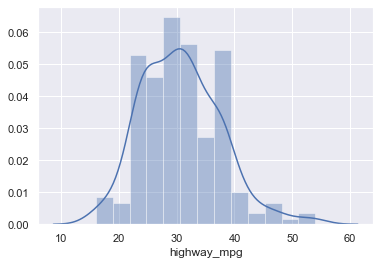

In [9]:
# This will draw a histogram and fit a kernel density estimate (KDE).
sns.distplot(auto['highway_mpg']);

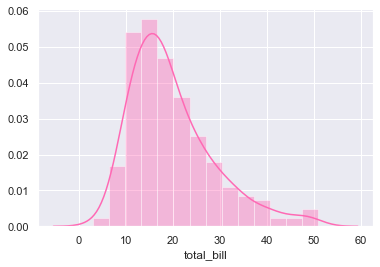

In [10]:
sns.distplot(tips['total_bill'],color='hotpink')

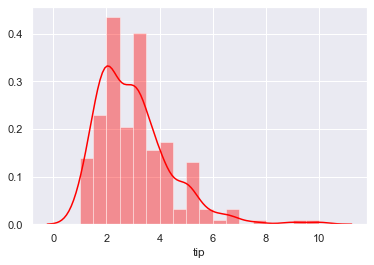

In [11]:
sns.distplot(tips['tip'],color='red')

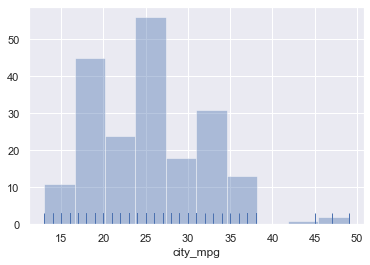

In [12]:
# we can turn the kde off and put a tic mark along the x-axis for every data point with rug
sns.distplot(auto['city_mpg'], kde=False, rug=True);

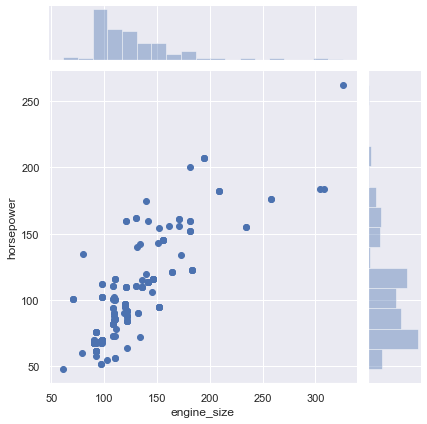

In [13]:
# It can also be useful to visualize a relationship between two variables.
# The easiest way to do this in seaborn is to use the jointplot() function, which creates a scatterplot of the two variables along with the histograms of each next to the appropriate axes.
sns.jointplot(auto['engine_size'], auto['horsepower']);

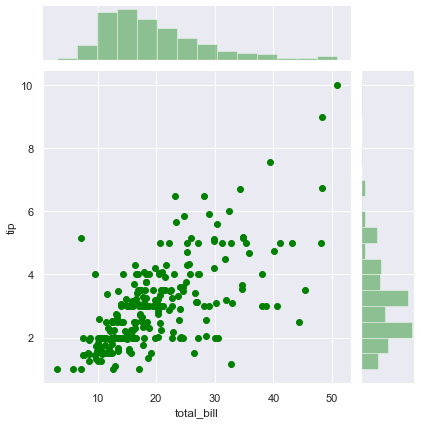

In [14]:
sns.jointplot(tips['total_bill'], tips['tip'],color='green')

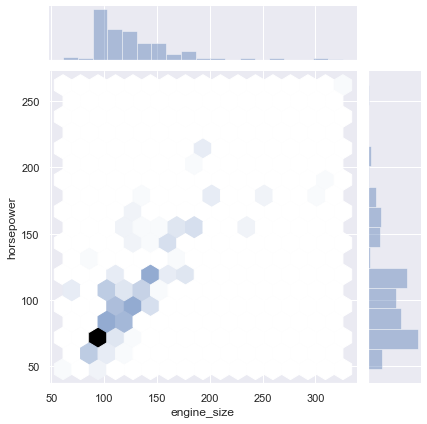

In [15]:
# We can make a hex bin plot that breaks the 2D area into hexagons and the number of points in each hexagon determines the color
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="hex");

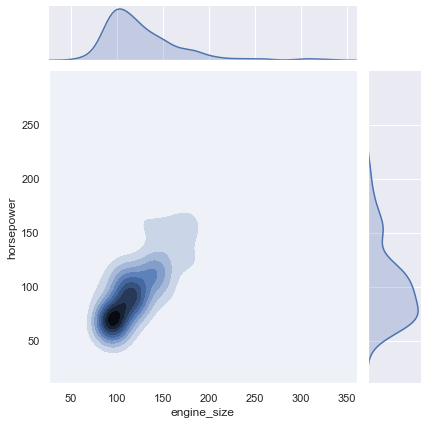

In [16]:
# We can make a 2D estimation of the density also
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="kde");

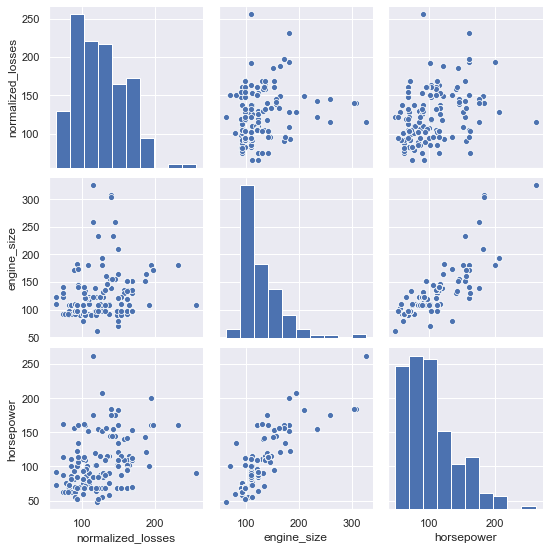

In [17]:
# To plot multiple pairwise scatterplots in a dataset, you can use the pairplot() function
sns.pairplot(auto[['normalized_losses', 'engine_size', 'horsepower']]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DED1F75910>,
      dtype=object)

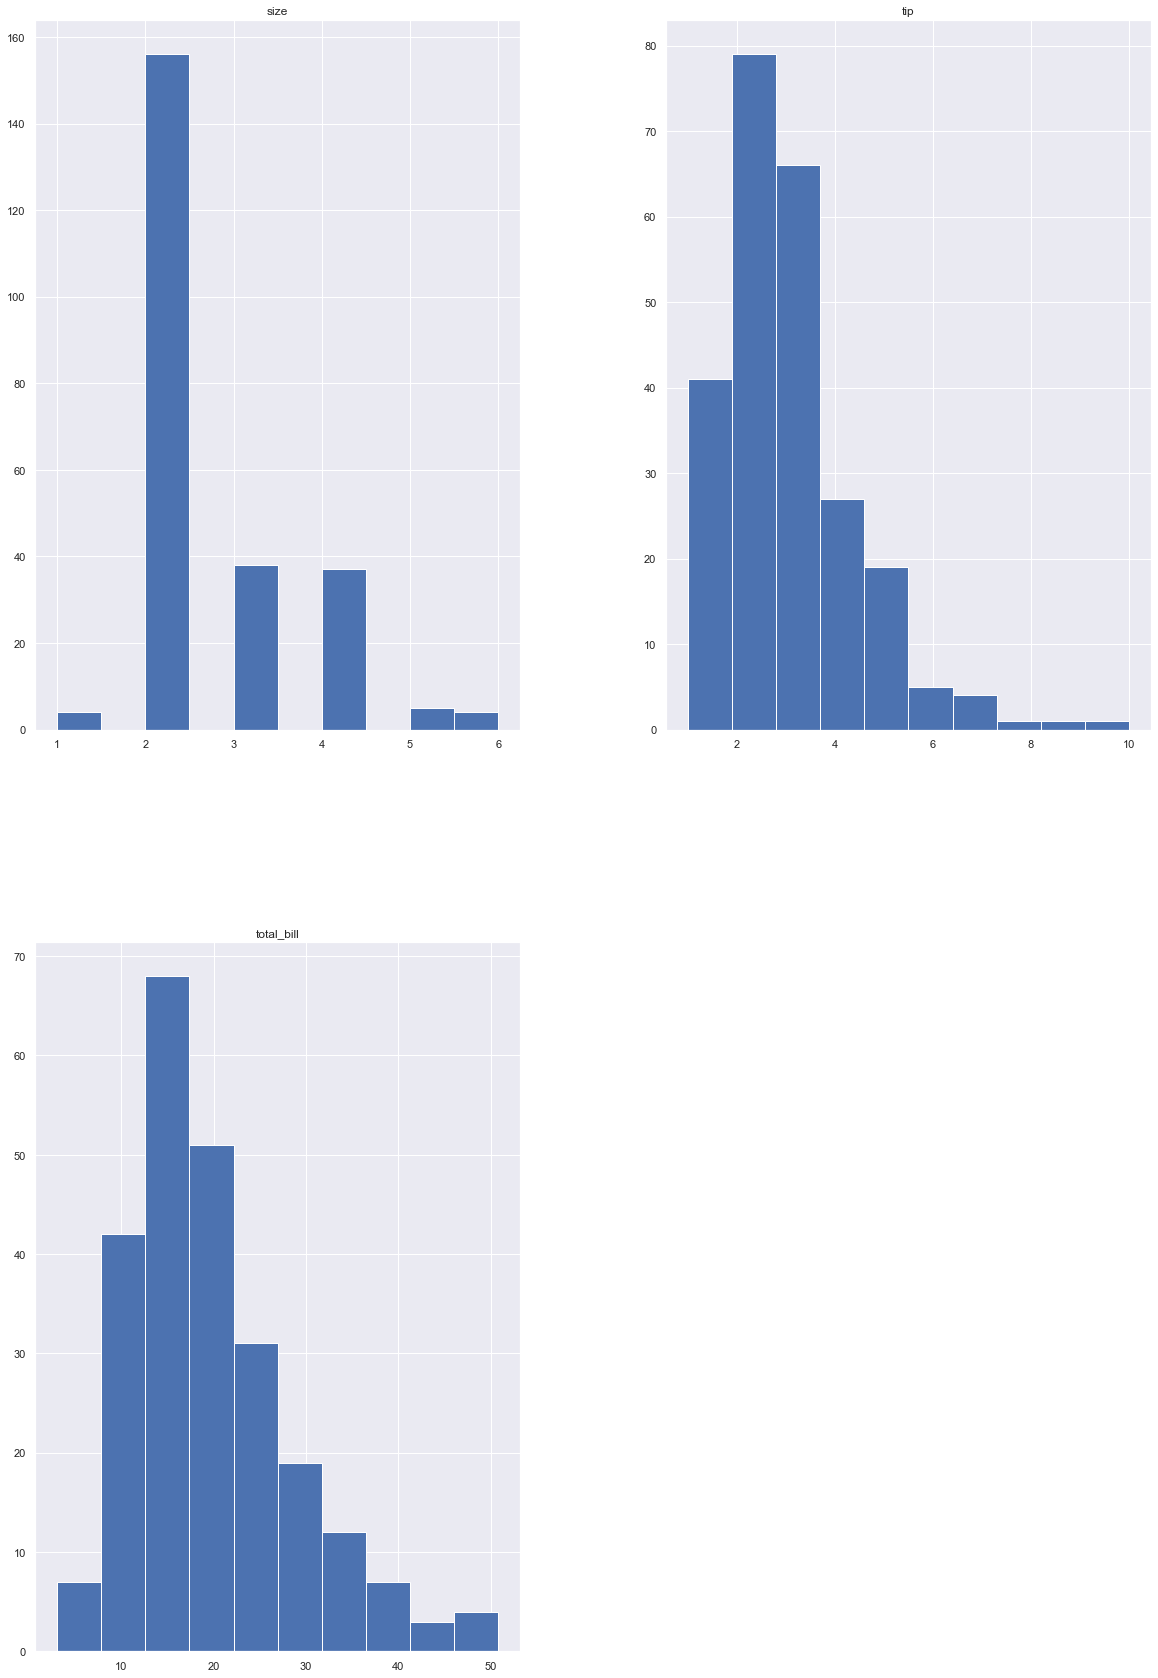

In [40]:
tips.hist(figsize=(20,30))

In [ ]:
pd.crosstab

### correlation between variables

In [18]:
cor = mydata[['numcol', 
              'yieldpercol', 
              'totalprod', 
              'stocks', 
              'priceperlb', 
              'prodvalue']].corr()

cor

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


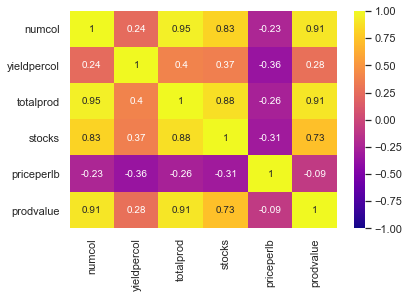

In [19]:
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)

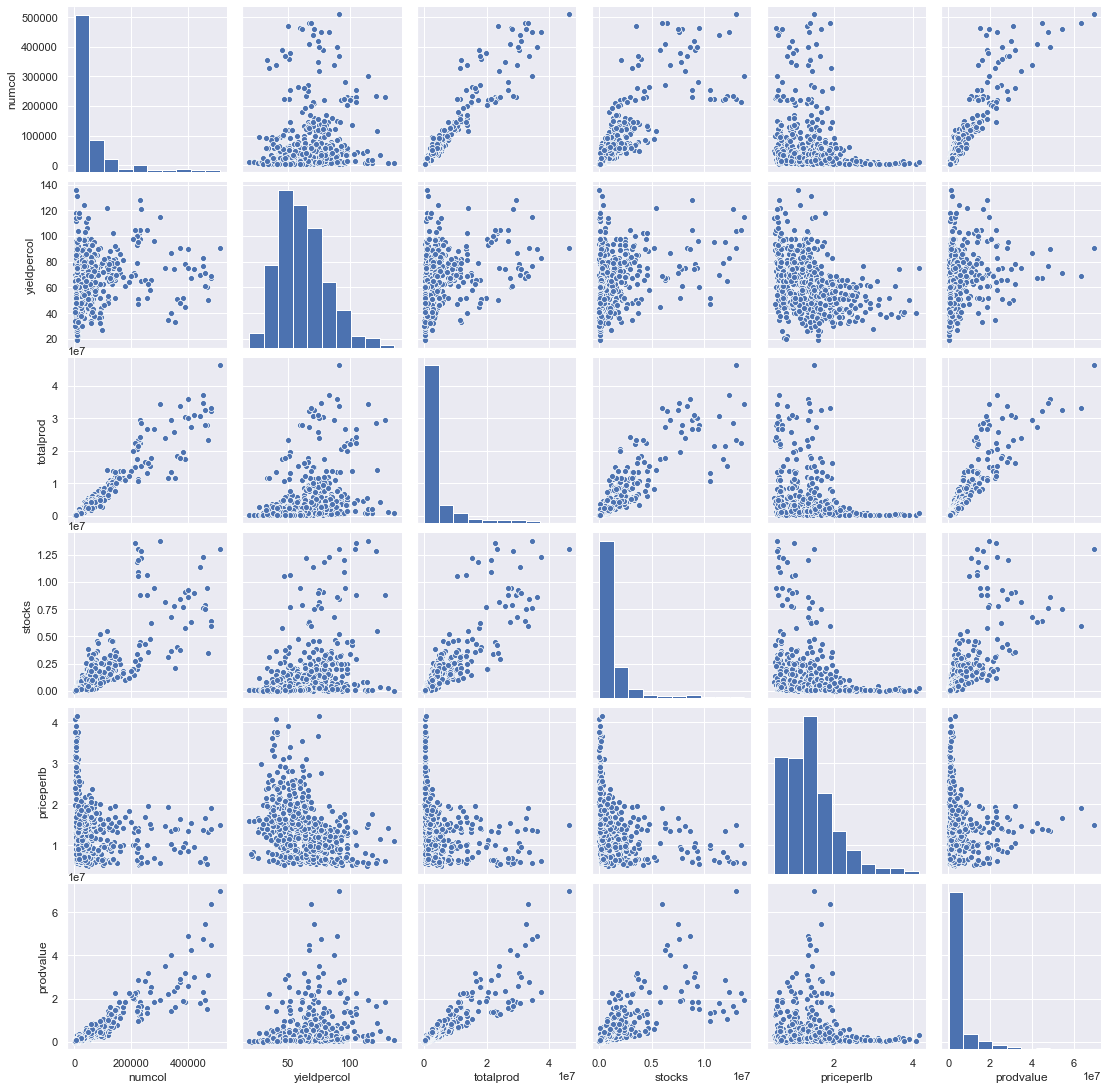

In [20]:
sns.pairplot(mydata[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']])

In [21]:
cor = mydata[['numcol', 
              'yieldpercol', 
              'totalprod', 
              'stocks', 
              'priceperlb', 
              'prodvalue']].corr()

In [22]:
cor

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


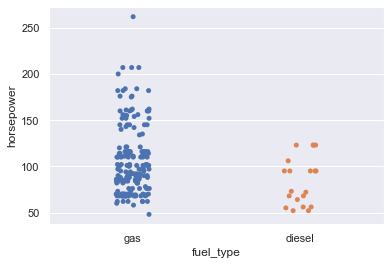

In [23]:
# In a strip plot, the scatterplot points will usually overlap. 
# This makes it difficult to see the full distribution of data.
# One easy solution is to adjust the positions (only along the categorical axis) using “jitter"
sns.stripplot(auto['fuel_type'], auto['horsepower'], jitter=True);

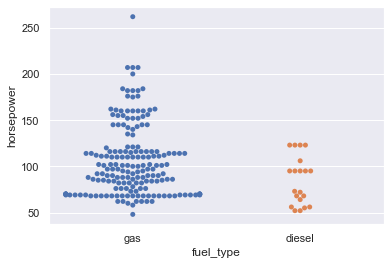

In [24]:
#  different approach would be to use the function swarmplot(), which positions each scatterplot point on the categorical axis and avoids overlapping points:
sns.swarmplot(auto['fuel_type'], auto['horsepower']);

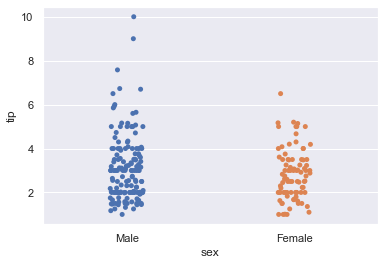

In [25]:
sns.stripplot(tips['sex'], tips['tip'])

### Box plots

Another common graph is a boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQR

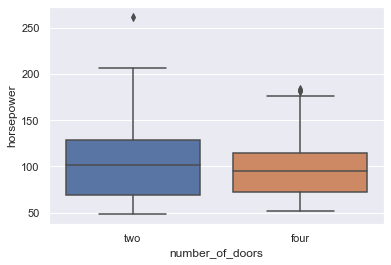

In [26]:
sns.boxplot(auto['number_of_doors'], auto['horsepower']);

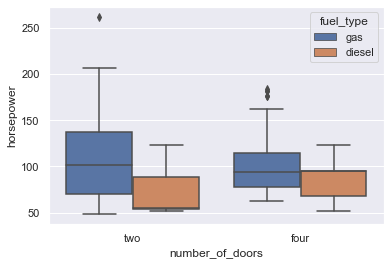

In [27]:
sns.boxplot(auto['number_of_doors'], auto['horsepower'], hue=auto['fuel_type']);

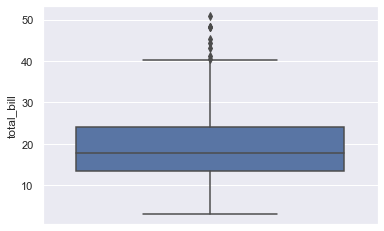

In [28]:
sns.boxplot(tips['total_bill'],orient='v')

### Bar plots

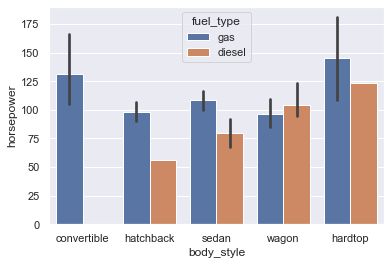

In [29]:
sns.barplot(auto['body_style'], auto['horsepower'], hue=auto['fuel_type']);

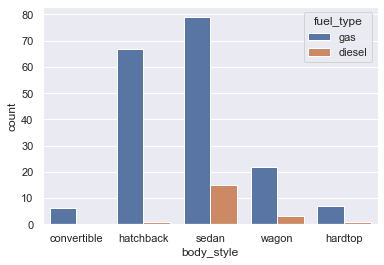

In [30]:
sns.countplot(auto['body_style'],hue=auto['fuel_type']);

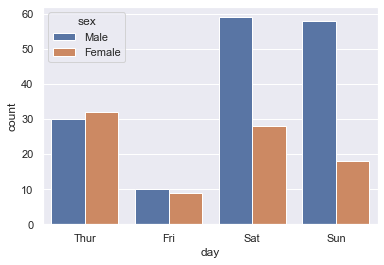

In [31]:
sns.countplot(tips['day'], hue = tips['sex'])

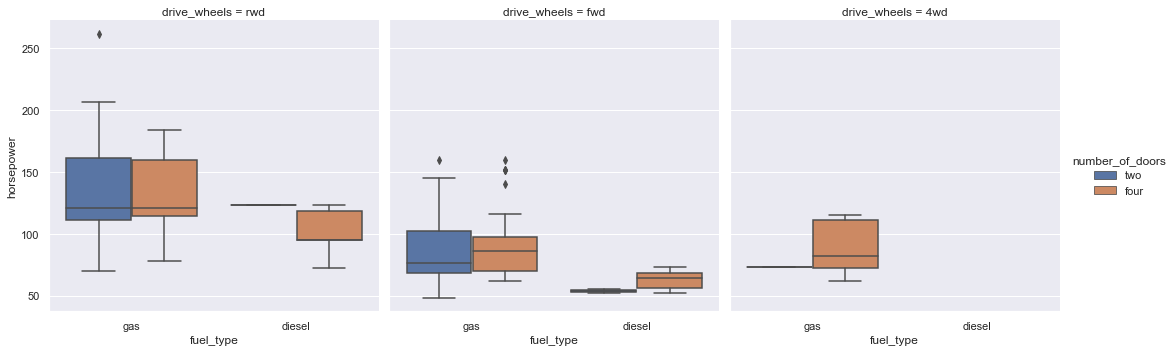

In [32]:
sns.catplot(x="fuel_type",
               y = "horsepower",
               hue="number_of_doors", 
               col="drive_wheels", 
               data=auto, 
               kind="box");


### Linear regression plots

lmplot() is one of the most widely used function to quickly plot the Linear Relationship between 2 variables

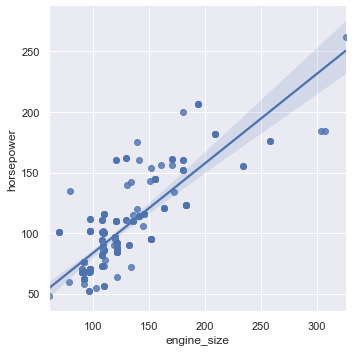

In [33]:
sns.lmplot(y="horsepower", x="engine_size", data=auto);

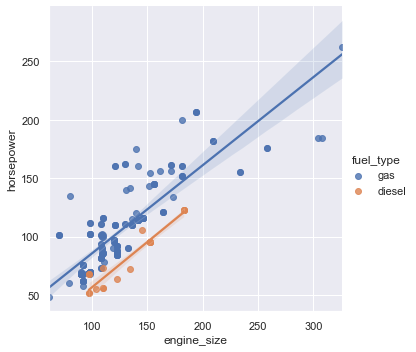

In [34]:
sns.lmplot(y="horsepower", x="engine_size",hue="fuel_type", data=auto);

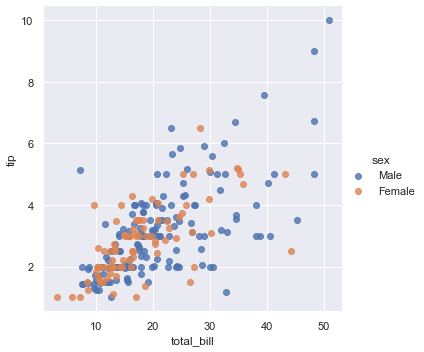

In [35]:
sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False,hue='sex')

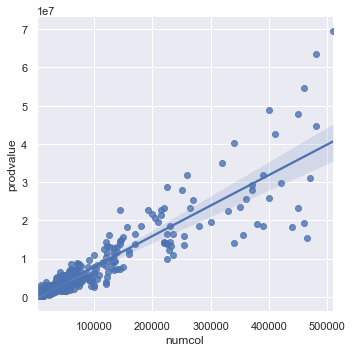

In [36]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata)

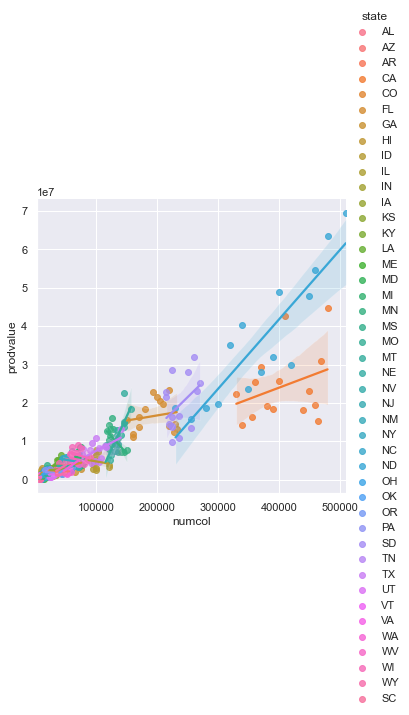

In [37]:
sns.lmplot(x="numcol", y="prodvalue", data=mydata, hue='state')